In [1]:
## Major Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy 

## Other
import os, joblib, missingno

## sklearn -- Preprocessing & Tuning & Transformation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

## sklearn -- metrics
from sklearn.metrics import mean_squared_error, r2_score

## sklearn -- Models
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor

## Xgboost
#from xgboost import XGBRegressor

In [2]:
df=pd.read_csv(r"C:\Users\Mariam\Downloads\Salary Data.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [4]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


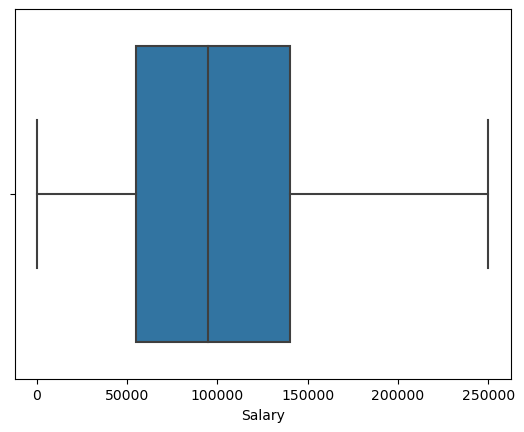

In [5]:
sns.boxplot(x=df['Salary'])
plt.show()

In [6]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

<Axes: >

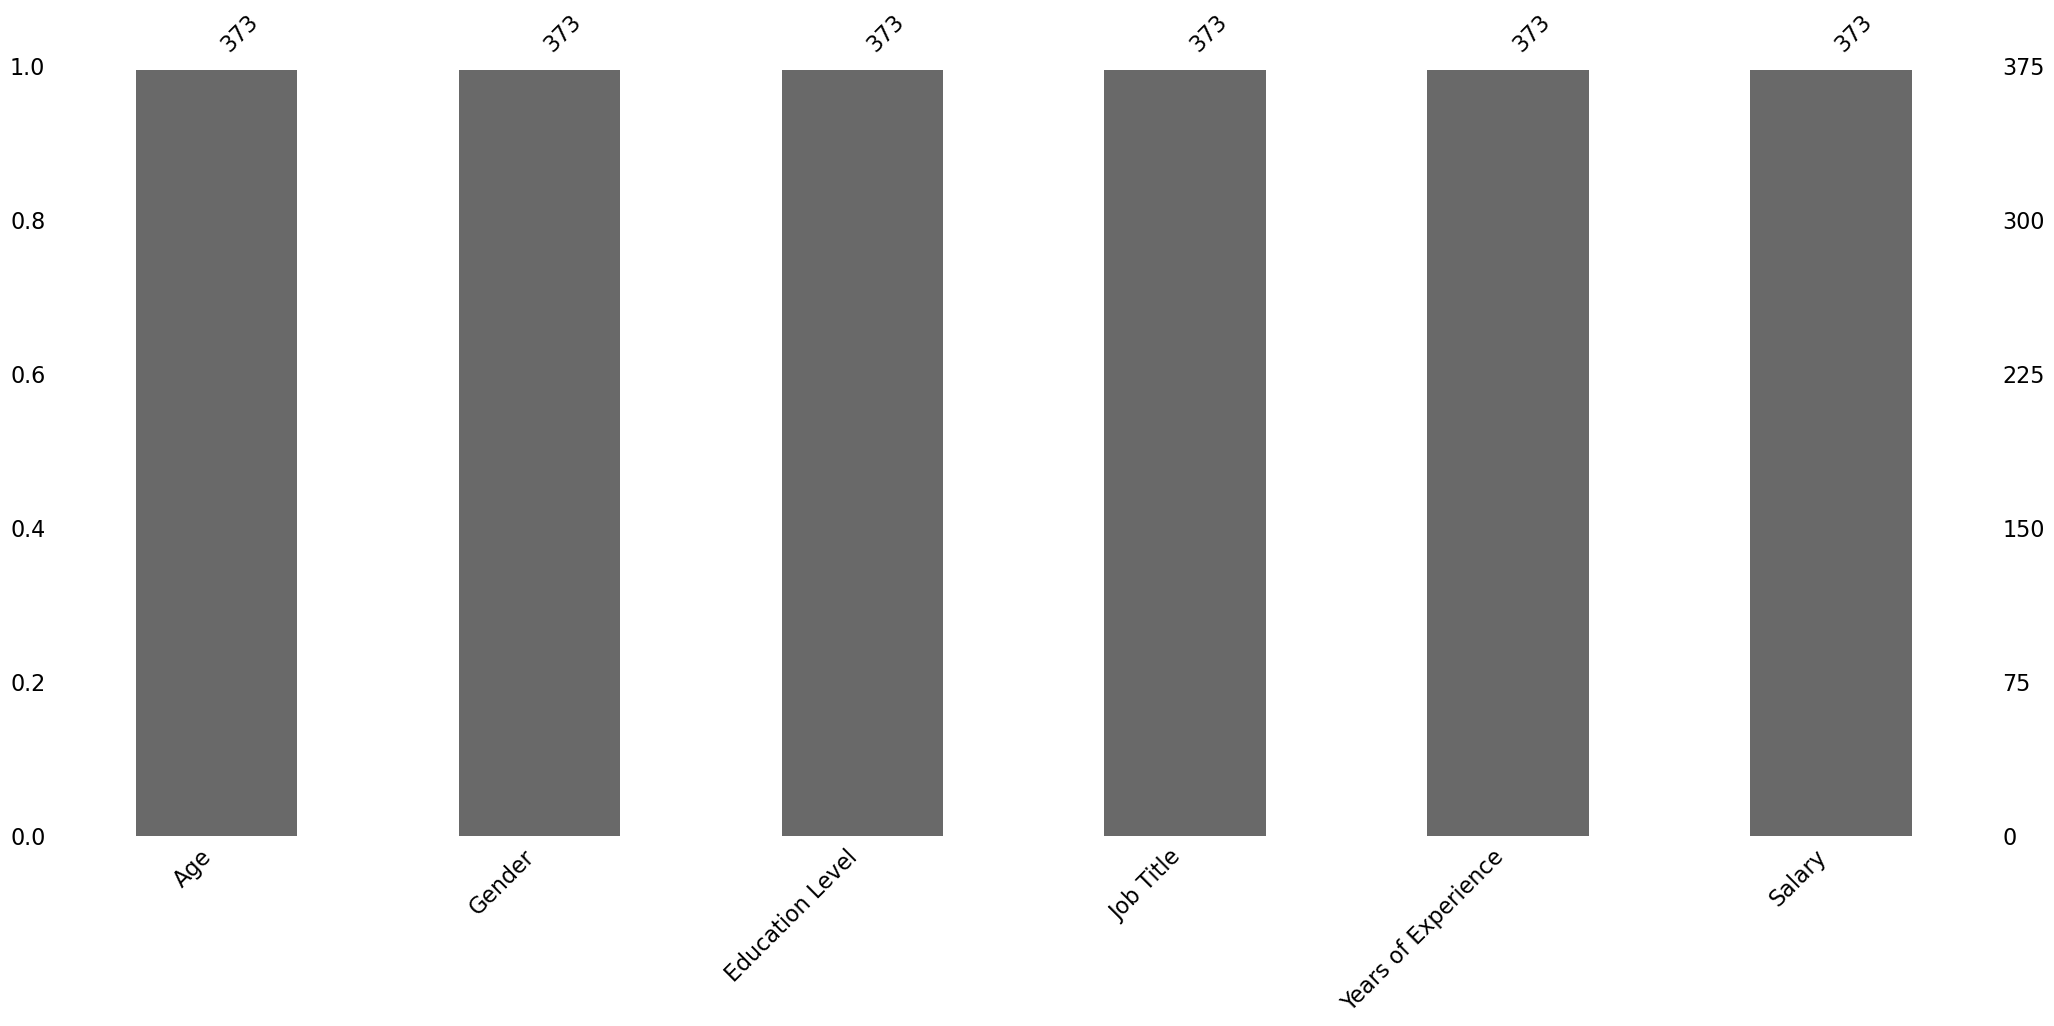

In [7]:
missingno.bar(df)

In [8]:
df = df.dropna(inplace=False)


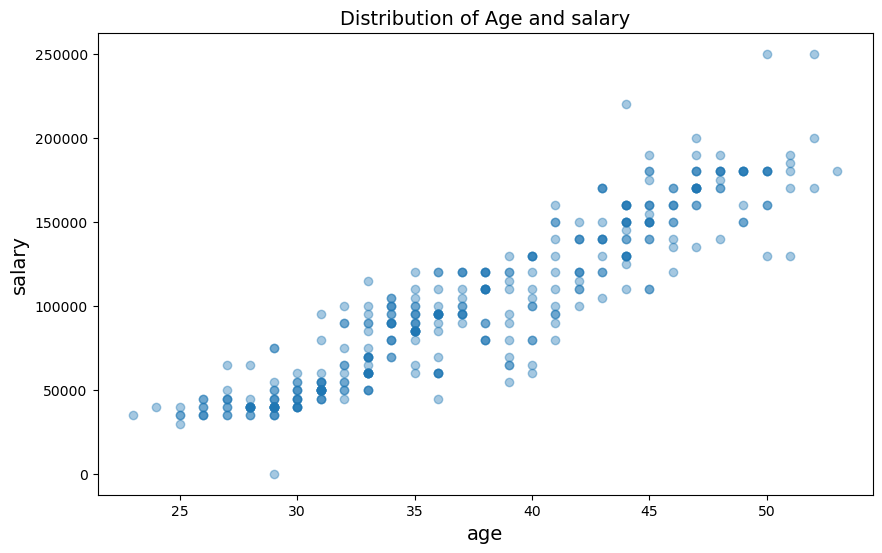

In [9]:
## Scatterplot with important Feature (medina_income) with the target (median_house_value)
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Salary'], alpha=0.4)
plt.title('Distribution of Age and salary', fontsize=14, c='k')
plt.xlabel('age', fontsize=14, c='k')
plt.ylabel('salary', fontsize=14, c='k')
plt.show()

In [10]:
unique_values = df["Education Level"].unique()
unique_values

array(["Bachelor's", "Master's", 'PhD'], dtype=object)

In [11]:
df = pd.get_dummies(df, columns=['Education Level'])

In [12]:
unique_values = df["Job Title"].nunique()
unique_values

174

In [13]:
unique_values = df["Gender"].nunique()
unique_values

2

In [14]:
df = pd.get_dummies(df, columns=['Gender'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 374
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         373 non-null    float64
 1   Job Title                   373 non-null    object 
 2   Years of Experience         373 non-null    float64
 3   Salary                      373 non-null    float64
 4   Education Level_Bachelor's  373 non-null    uint8  
 5   Education Level_Master's    373 non-null    uint8  
 6   Education Level_PhD         373 non-null    uint8  
 7   Gender_Female               373 non-null    uint8  
 8   Gender_Male                 373 non-null    uint8  
dtypes: float64(3), object(1), uint8(5)
memory usage: 16.4+ KB


In [16]:
df["Education Level_Bachelor's"] = df["Education Level_Bachelor's"].astype(int)
df['Gender_Female'] = df['Gender_Female'].astype(int)
df['Gender_Male'] = df['Gender_Male'].astype(int)
df["Education Level_Master's"] = df["Education Level_Master's"].astype(int)
df["Education Level_PhD"] = df["Education Level_PhD"].astype(int)


C:\Users\Mariam\AppData\Local\Temp\ipykernel_20468\3749504314.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


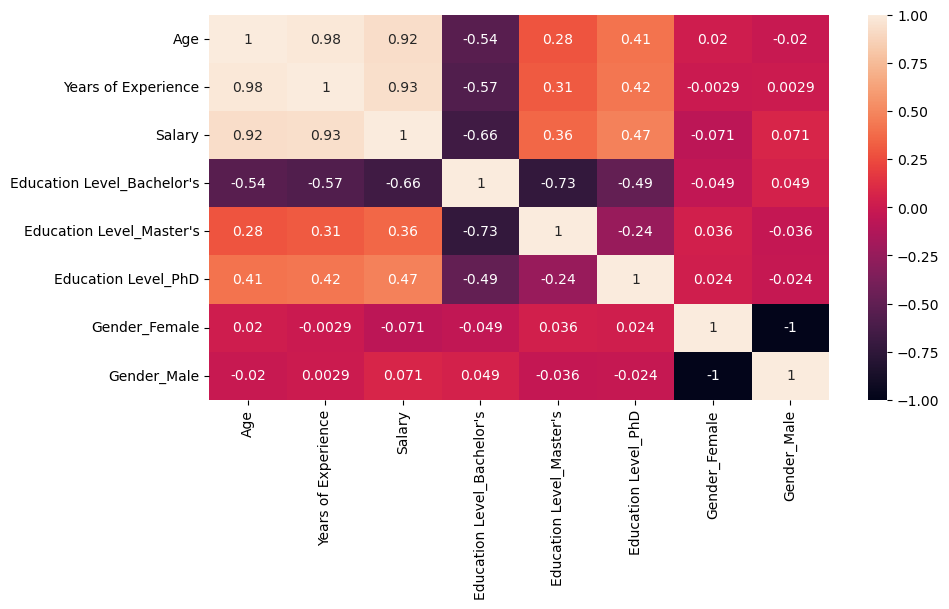

In [17]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [18]:
df

,Age,Job Title,Years of Experience,Salary,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD,Gender_Female,Gender_Male
0,32.0,Software Engineer,5.0,90000.0,1,0,0,0,1
1,28.0,Data Analyst,3.0,65000.0,0,1,0,1,0
2,45.0,Senior Manager,15.0,150000.0,0,0,1,0,1
3,36.0,Sales Associate,7.0,60000.0,1,0,0,1,0
4,52.0,Director,20.0,200000.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
370,35.0,Senior Marketing Analyst,8.0,85000.0,1,0,0,1,0
371,43.0,Director of Operations,19.0,170000.0,0,1,0,0,1
372,29.0,Junior Project Manager,2.0,40000.0,1,0,0,1,0
373,34.0,Senior Operations Coordinator,7.0,90000.0,1,0,0,0,1


In [19]:
# Assuming you have a DataFrame named df with the mentioned columns

# Feature Engineering
# Create a new feature by combining 'Education Level' and 'Gender'
df['education_gender_interaction'] = (
    df["Education Level_Bachelor's"] * df['Gender_Female'] +
    df["Education Level_Master's"] * df['Gender_Male']
)

# Display the first few rows of the DataFrame to verify
print(df.head())

# Check the correlation
correlation = df.corr()['Salary'].sort_values(ascending=False)

# Display the correlation values
print(correlation)


    Age          Job Title  Years of Experience    Salary  \
0  32.0  Software Engineer                  5.0   90000.0   
1  28.0       Data Analyst                  3.0   65000.0   
2  45.0     Senior Manager                 15.0  150000.0   
3  36.0    Sales Associate                  7.0   60000.0   
4  52.0           Director                 20.0  200000.0   

   Education Level_Bachelor's  Education Level_Master's  Education Level_PhD  \
0                           1                         0                    0   
1                           0                         1                    0   
2                           0                         0                    1   
3                           1                         0                    0   
4                           0                         1                    0   

   Gender_Female  Gender_Male  education_gender_interaction  
0              0            1                             0  
1              1            

C:\Users\Mariam\AppData\Local\Temp\ipykernel_20468\3377865958.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['Salary'].sort_values(ascending=False)


C:\Users\Mariam\AppData\Local\Temp\ipykernel_20468\3749504314.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


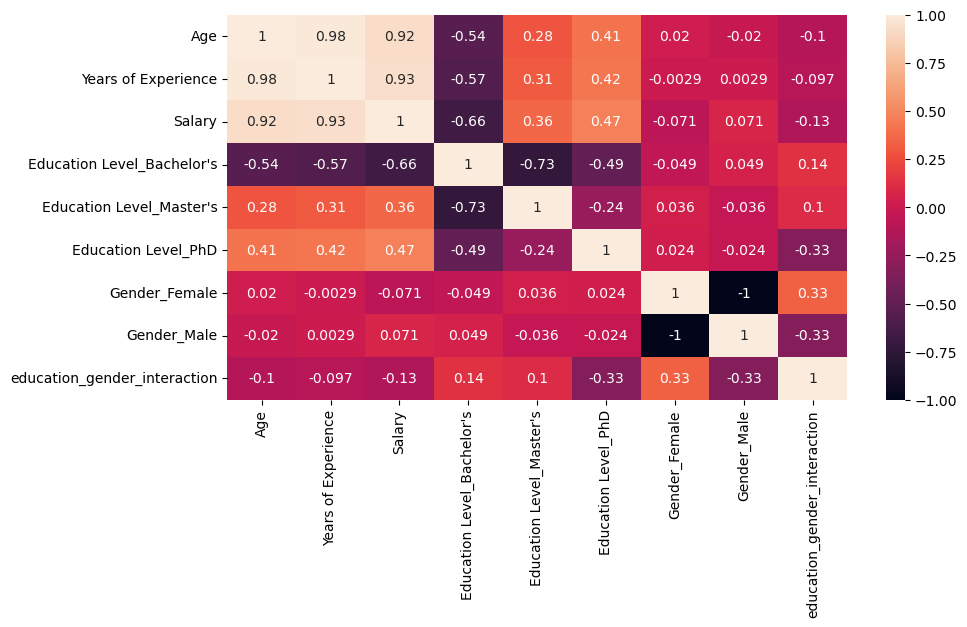

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [21]:
# Find the number of duplicate rows
num_duplicates = df.duplicated().sum()
nduplicates = df.duplicated()
print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 49


In [22]:
duplicates = df[df.duplicated()]

# Print the duplicate rows
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
      Age                              Job Title  Years of Experience  \
195  28.0                Junior Business Analyst                  2.0   
250  30.0           Junior Marketing Coordinator                  2.0   
251  38.0                   Senior IT Consultant                  9.0   
252  45.0                Senior Product Designer                 15.0   
253  28.0  Junior Business Development Associate                  2.0   
254  35.0               Senior Marketing Analyst                  8.0   
255  44.0               Senior Software Engineer                 14.0   
256  34.0               Senior Financial Advisor                  6.0   
257  35.0             Senior Project Coordinator                  9.0   
258  50.0                 Director of Operations                 22.0   
262  46.0                  Senior Data Scientist                 18.0   
281  41.0             Senior Project Coordinator                 11.0   
287  35.0               Senior Mark

In [23]:
df.drop("Job Title", axis=1, inplace=True)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 374
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           373 non-null    float64
 1   Years of Experience           373 non-null    float64
 2   Salary                        373 non-null    float64
 3   Education Level_Bachelor's    373 non-null    int32  
 4   Education Level_Master's      373 non-null    int32  
 5   Education Level_PhD           373 non-null    int32  
 6   Gender_Female                 373 non-null    int32  
 7   Gender_Male                   373 non-null    int32  
 8   education_gender_interaction  373 non-null    int32  
dtypes: float64(3), int32(6)
memory usage: 20.4 KB


In [25]:
## Split the whole Dataset to Feature & Target
X = df.drop(columns=['Salary'], axis=1)   ## Features
y = df['Salary']   ## target

In [26]:
X.shape


(373, 8)

In [27]:
y.shape

(373,)

In [28]:
## Random split the dataset to two sets (train_set, test_set)
## For validation ---  I will use Cross Validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)


## Check Shapes of these Sets
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (298, 8)
y_train shape --  (298,)
X_test shape --  (75, 8)
y_test shape --  (75,)


In [29]:
## using StandardScaler for each Feature to be (mean=0, std=1)
## This techniques helps for better training and to converge faster and put all features in the same scale
scaler = StandardScaler()  ## define an instance

## Learn and Transform in one step for train set , and transform only for test set
X_train_scaled = scaler.fit_transform(X_train)  ## train
X_test_scaled = scaler.transform(X_test)  ## test

In [30]:
## LinearRegression -- Regression using Ordinary Least Squares (OLS) Method

## define the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)  ## train

LinearRegression()

In [31]:
lin_reg.score(X_train_scaled, y_train)


0.9021392116941659

In [32]:
lin_reg.coef_, lin_reg.intercept_

(array([26413.80712958, 11394.10818573, -6517.21880218,  3159.8693721 ,
         5320.67177751, -2201.10822204,  2201.10822204,  1493.47029183]),
 100101.8456375839)

In [33]:
X_train_scaled.shape

(298, 8)

In [34]:
X_test_scaled.shape

(75, 8)

Mean Squared Error: 240017628.42960057
R-squared: 0.8956638469571473


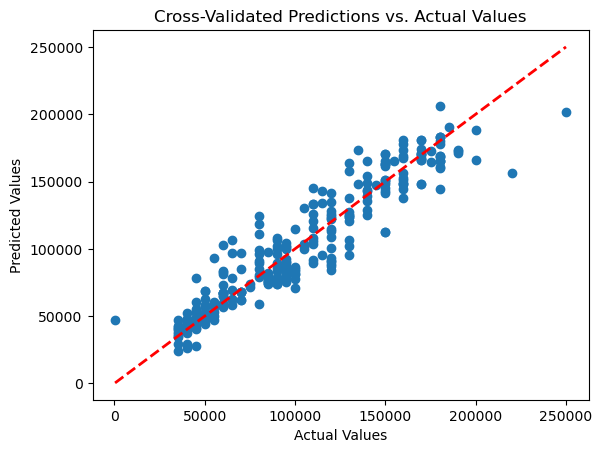

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming X_train_scaled and y_train are already defined

# Create a linear regression model
model = make_pipeline(StandardScaler(), LinearRegression())

# Make cross-validated predictions
y_pred_cv = cross_val_predict(model, X_train_scaled, y_train, cv=5)

# Calculate performance metrics
mse = mean_squared_error(y_train, y_pred_cv)
r2 = r2_score(y_train, y_pred_cv)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot predicted vs. actual values
plt.scatter(y_train, y_pred_cv)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Cross-Validated Predictions vs. Actual Values')
plt.show()
